# Energy Consumption Analysis for Various Types of Buildings in Singapore

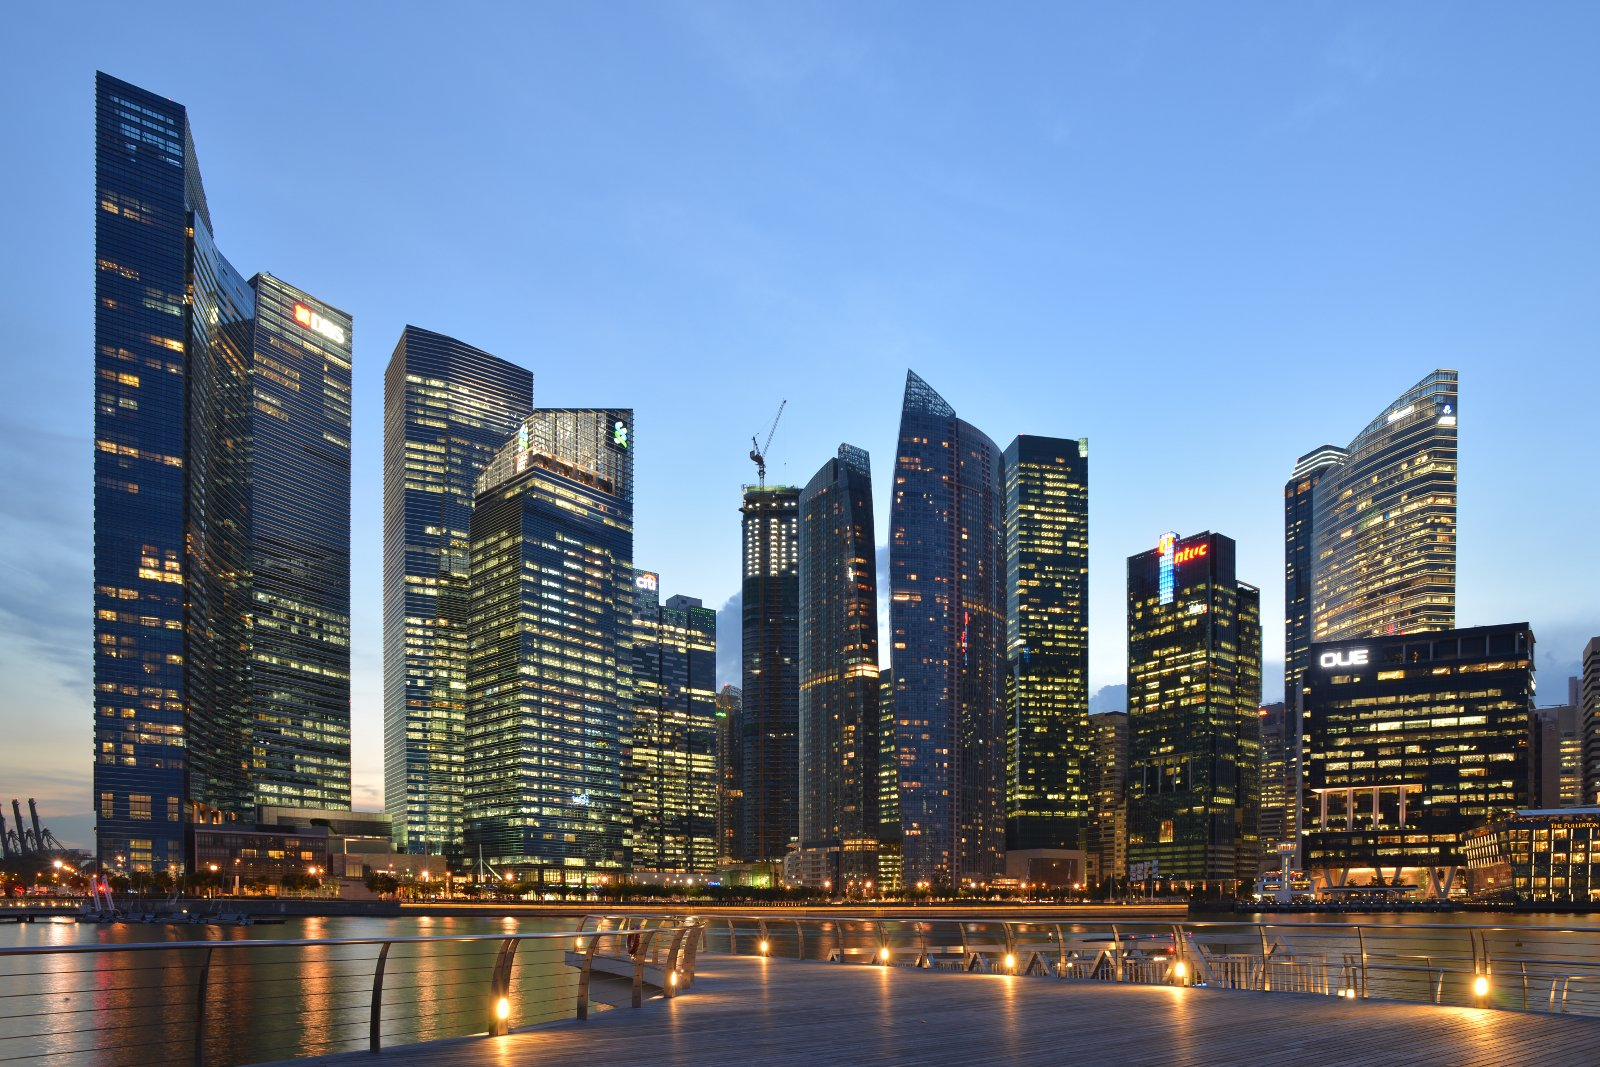

# Introduction 

Climate change has caused extreme weather conditions to be experienced worldwide. We all have a role to play in mitigating climate change by reducing carbon emissions. Singapore’s building sector consumes up to 38% of the nation’s electricity. With a focus on addressing the environmental impact caused by buildings, the Building and Construction Authority (BCA) of Singapore formulates and charts green building policies to track and improve the energy efficiency of the built environment in Singapore under our Green Building Master plan. These policies have met with much success, helping to trigger a green movement in the built environment sector, not just in Singapore, but also the region.

*Source: Extracted from BCA building energy benchmarking report 2014*

# Objective 

This notebook will study the followings:
1. How many type of buildings included in this data set?
2. What are the average energy consumption for each type of building?

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('../input/annual-energy-consumption-from-singapore-buildings/listing-of-building-energy-performance-data-for-commercial-buildings.csv')

**1. The following codes will derive how many type of buildings included in this data set?**

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
build_type = df['buildingtype']

In [ ]:
build_type_drop = build_type.drop_duplicates()

In [ ]:
build_type_drop_dataframe = pd.DataFrame(build_type_drop)

In [ ]:
build_type_drop_dataframe
# The table below shows all the building types included in this data set: 

In [ ]:
type_num = []
for i in range(len(build_type_drop)):
    type_num.append(0)
for i in range(len(build_type_drop)):
    for j in build_type:
        if np.array(build_type_drop)[i] == j:
            type_num[i] = type_num[i] + 1

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.pie(type_num,labels=build_type_drop,autopct='%1.2f%%')
plt.title("Percentage of different buildings")
plt.show()

**2. What are the average energy consumption for each type of building?**

The average energy consumption of different type of buildings are important benchmark for reference. The retrofitted and new buildings can refer to those energy consumption benchmarks for verification of the energy efficiency of building and associated mechnanical and electrical system. 

In [ ]:
en_2017 = df["2017energyuseintensity"]
en_2018 = df["2018energyusintensity"]

In [ ]:
en_2017_sum = []
en_2018_sum = []
for i in range(len(build_type_drop)):
    en_2017_sum.append(0)
    en_2018_sum.append(0)
for i in range(len(build_type_drop)):
    num_ = 0
    aver_2017 = 0
    aver_2018 = 0
    for j in range(len(build_type)):
        if np.array(build_type_drop)[i] == build_type[j]:
            aver_2017 = aver_2017 + en_2017[j]
            aver_2018 = aver_2018 + en_2018[j]
            num_ = num_ + 1
    en_2017_sum[i] = aver_2017 / num_
    en_2018_sum[i] = aver_2018 / num_

In [ ]:
aver_zong = []
for i in range(len(build_type_drop)):
    aver_zong.append((en_2017_sum[i] + en_2018_sum[i]) / 2)

In [ ]:
aver_zong_np = np.array(aver_zong).reshape(-1,1)
build_type_drop_np = np.array(build_type_drop).reshape(-1,1)
table = np.concatenate((build_type_drop_np, aver_zong_np), axis=1)

In [ ]:
table = pd.DataFrame(table, columns=['Building Type', 'Average energy consumption'])

In [ ]:
table #Average energy consumption

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
num_list = aver_zong  
plt.bar(build_type_drop, num_list)
plt.xticks(rotation=90)
plt.title('The average energy consumption for each type of buildings')
plt.xlabel('Building type')
plt.ylabel('Average energy consumption')
plt.show()   

# Conclusion

Refer to above coding study, there are total 17 types of buildings included in the data set. 

Out of the 17 types of building, refer to the average energy consumption analysis, the top three highest energy consuming buildings are private hospital, retail and general hospital. This analysis data provides the useful reference for understanding of energy consumptions for different types of buildings. 